In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

# Read the dataset into a DataFrame
data = pd.read_csv('mall_customers.csv')

data




,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
#transform Gender to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

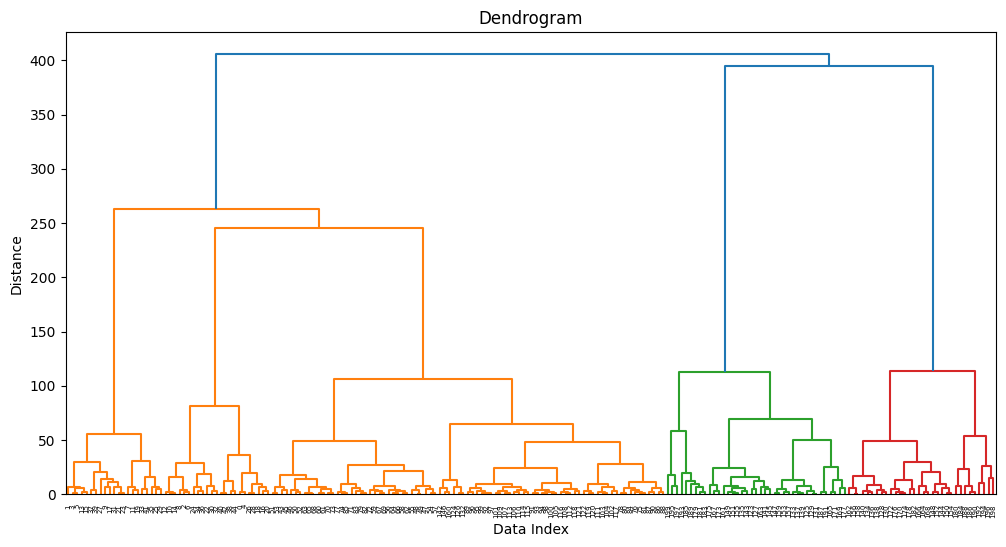

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
#feature selection
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
# Perform hierarchical clustering
Z = linkage(selected_features, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster

# Extract cluster labels
k = 3  # Desired number of clusters
labels = fcluster(Z, k, criterion='maxclust')

# Assign the cluster labels to the data
data['Cluster'] = labels
